**PART A: CLASSIFICATION TASK**

Import Libraries

In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.neural_network import MLPClassifier


Load Dataset

In [76]:
import pandas as pd
df = pd.read_csv("/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Understanding

In [77]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data Cleaning

In [79]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())


Exploratory Data Analysis (EDA)

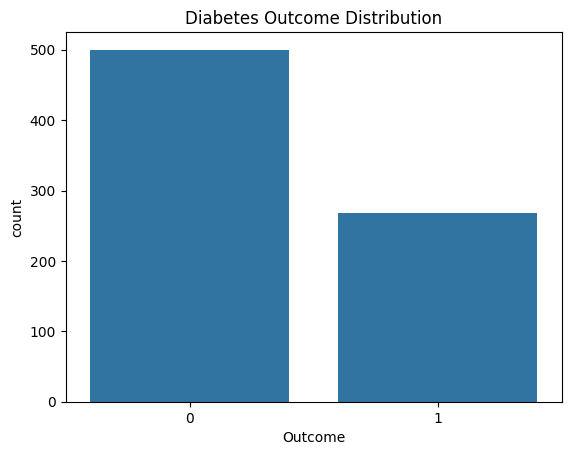

In [80]:
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


Correlation Heatmap

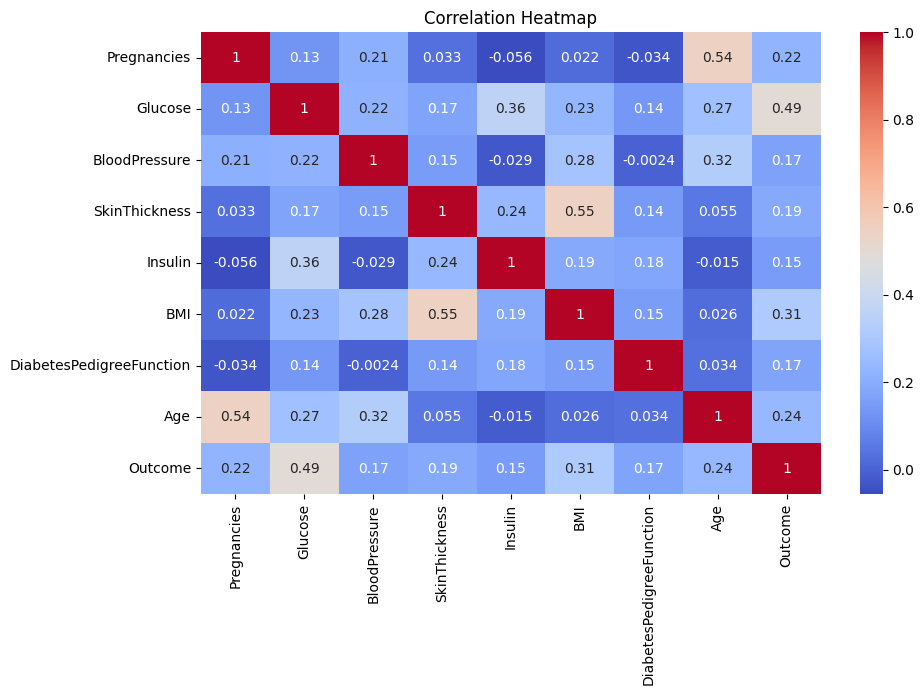

In [81]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Train–Test Split & Scaling

In [82]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Neural Network Model (MLP)

In [83]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print("Neural Network Performance")
print(classification_report(y_test, y_pred_mlp))


Neural Network Performance
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classical Model 1: Logistic Regression

In [84]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



Classical Model 2: Random Forest

In [85]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



Hyperparameter Tuning (GridSearchCV)
Logistic Regression

In [86]:
param_lr = {
    'C': [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000),
                       param_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

grid_lr.best_params_


{'C': 10}

Random Forest

In [87]:
param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

grid_rf.best_params_


{'max_depth': 10, 'n_estimators': 200}

Feature Selection (RFE – Logistic Regression)

In [88]:
rfe = RFE(LogisticRegression(max_iter=1000), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
selected_features


Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

Final Model Evaluation

In [89]:
final_lr = LogisticRegression(C=grid_lr.best_params_['C'], max_iter=1000)
final_lr.fit(X_train[:, rfe.support_], y_train)

final_pred = final_lr.predict(X_test[:, rfe.support_])

print("Final Logistic Regression Model")
print(classification_report(y_test, final_pred))


Final Logistic Regression Model
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



**PART B: REGRESSION TASK**

Import Libraries

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


Load Dataset

In [91]:
df = pd.read_csv("/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Cleaning

In [92]:
df.drop(['id', 'date'], axis=1, inplace=True, errors='ignore')

EDA

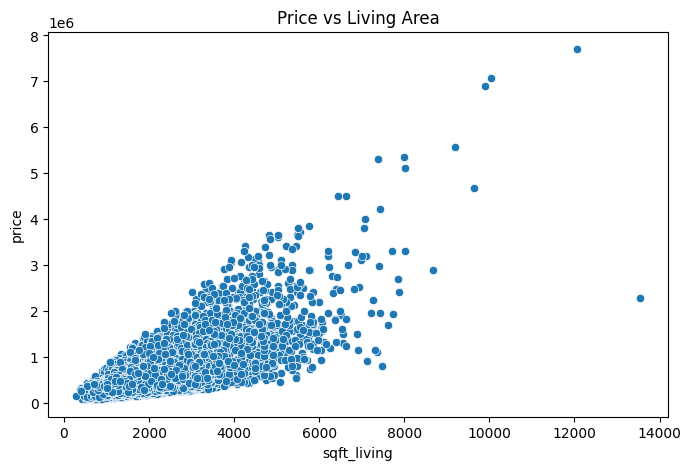

In [93]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title("Price vs Living Area")
plt.show()


Train–Test Split & Scaling

In [94]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Neural Network Regressor

In [95]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(64,32),
                       max_iter=500,
                       random_state=42)

mlp_reg.fit(X_train, y_train)

pred_mlp = mlp_reg.predict(X_test)

print("NN RMSE:", np.sqrt(mean_squared_error(y_test, pred_mlp)))
print("NN R2:", r2_score(y_test, pred_mlp))


NN RMSE: 181207.8370064435
NN R2: 0.782795380966062


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Linear Regression

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("LR RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("LR R2:", r2_score(y_test, pred_lr))


LR RMSE: 212539.51663817756
LR R2: 0.7011904448878412


Random Forest Regressor

In [97]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

pred_rf = rf_reg.predict(X_test)

print("RF RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("RF R2:", r2_score(y_test, pred_rf))


RF RMSE: 148684.3214107646
RF R2: 0.8537669783701961


  Hyperparameter Tuning

In [98]:
param_rf = {
    'n_estimators': [100,100],
    'max_depth': [50, 50]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(
        random_state=42
    ),
    param_rf,
    cv=2,
    scoring='r2',
    n_jobs=2,
    verbose=1
)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_


Fitting 2 folds for each of 4 candidates, totalling 8 fits


{'max_depth': 50, 'n_estimators': 100}

Feature Importance

In [99]:
importances = rf_reg.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head()


,0
grade,0.314274
sqft_living,0.274926
lat,0.153213
long,0.063410
yr_built,0.032626


Feature Selection

In [100]:

best_rf = RandomForestRegressor(
    n_estimators=grid_rf.best_params_['n_estimators'],
    max_depth=grid_rf.best_params_['max_depth'],
    random_state=42
)

best_rf.fit(X_train, y_train)

importances = best_rf.feature_importances_
features = X.columns

feature_importance = pd.Series(importances, index=features)
feature_importance = feature_importance.sort_values(ascending=False)

selected_features = feature_importance.head(8).index.tolist()
selected_features


['grade',
 'sqft_living',
 'lat',
 'long',
 'yr_built',
 'waterfront',
 'sqft_living15',
 'sqft_above']

  Rebuild FINAL MODELS with Selected Features

In [101]:
X_train_sel = X_train[:, [X.columns.get_loc(f) for f in selected_features]]
X_test_sel = X_test[:, [X.columns.get_loc(f) for f in selected_features]]


Final Model 1: Linear Regression

In [102]:
final_lr = LinearRegression()
final_lr.fit(X_train_sel, y_train)

lr_pred = final_lr.predict(X_test_sel)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)


Final Model 2: Random Forest Regressor

In [103]:
final_rf = RandomForestRegressor(
    n_estimators=grid_rf.best_params_['n_estimators'],
    max_depth=grid_rf.best_params_['max_depth'],
    random_state=42
)

final_rf.fit(X_train_sel, y_train)

rf_pred = final_rf.predict(X_test_sel)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)


Cross-Validation Scores

In [104]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(final_lr, X_train_sel, y_train, cv=3, scoring='r2').mean()
rf_cv = cross_val_score(final_rf, X_train_sel, y_train, cv=3, scoring='r2').mean()


**FINAL COMPARISON TABLE OF BOTH **

In [105]:
final_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "Features Used": [f"Selected ({len(selected_features)})", f"Selected ({len(selected_features)})"],
    "CV Score": [round(lr_cv, 3), round(rf_cv, 3)],
    "Test RMSE": [round(lr_rmse, 2), round(rf_rmse, 2)],
    "Test R-squared": [round(lr_r2, 3), round(rf_r2, 3)]
})

final_results


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Linear Regression,Selected (8),0.675,219859.00,0.680
1,Random Forest Regressor,Selected (8),0.869,144185.13,0.862
